# Importing Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns  

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Preprocessing and Visualization

In [ ]:
data = pd.read_csv("http://bit.ly/w-data")
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
data.shape

(25, 2)

In [ ]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

<Figure size 864x432 with 0 Axes>

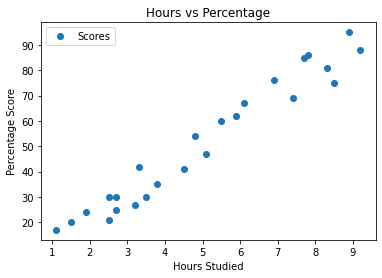

In [ ]:
# Plotting the distribution of scores
plt.figure(figsize=(12,6))
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

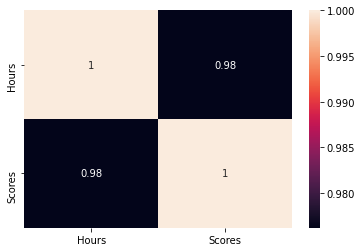

In [ ]:
cor = data.corr()
sns.heatmap(data = cor, annot = True)

In [ ]:
x = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

# Splitting data in train and test and applying model

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.25, random_state=0) 

In [ ]:
reg = LinearRegression()  
reg.fit(x_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# l = m*x + c
m = reg.coef_
c = reg.intercept_
print("Value of slope is {} and value of intercept is {}".format(m,c))

Value of slope is [9.94167834] and value of intercept is 1.9322042531516601


In [ ]:
#calulating l
l = m*x_train + c

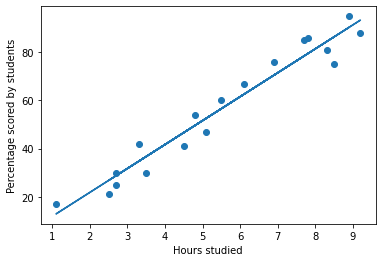

In [ ]:
plt.scatter(x = x_train, y = y_train)
plt.plot(x_train, l)
plt.ylabel('Percentage scored by students', fontsize=10)
plt.xlabel('Hours studied', fontsize=10)
plt.show()

# Predicting values from our Model

In [ ]:
y_predict = reg.predict(x_test)
y_predict

array([16.84472176, 33.74557494, 75.50062397, 26.7864001 , 60.58810646,
       39.71058194, 20.8213931 ])

In [ ]:
#Comparing actual values and predicted values
compare_data = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})
compare_data

,Actual,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


#Calculating Accuracy and Errors

In [ ]:
print('Mean Absolute Error: {}'.format(mean_absolute_error(y_test, y_predict)))
print('Mean Squared Error: {}'.format(mean_squared_error(y_test, y_predict)))
print('Root Mean Squared Error: {}'.format(np.sqrt(mean_squared_error(y_test, y_predict))))
print("R2_score is: {}".format(r2_score(y_test, y_predict)))


Mean Absolute Error: 4.130879918502482
Mean Squared Error: 20.33292367497996
Root Mean Squared Error: 4.509204328368805
R2_score is: 0.9367661043365056


# Predicting student score if he/she studies 9.25 hr/day

In [ ]:
hours = [9.25]
own_pred = reg.predict([hours])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [9.25]
Predicted Score = 93.89272889341652
